In [1]:
import os, time
import matplotlib.pyplot as plt
import numpy as np
import dgl
import dgl.function as fn
import pickle as pkl
import torch
from sklearn.metrics import recall_score, precision_score, roc_auc_score

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [3]:
import seaborn
import matplotlib.ticker as ticker

In [4]:
from xgnn_src.node.teacher import GCN_MLP2
import torch.nn.functional as F

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8, 8]

In [6]:
from utils import *
from xgnn_src.node.eval import *

In [7]:
Arg = collections.namedtuple("Arg", ["teacher_name", "hidden_sizes", "n_layers", "dropout", "n_hidden", "all_layer_dp", "skip_norm"])

```
python train.py --teacher-name gat --dataset BAS --n-epochs 1000 --n-hidden 32 --n-layers 4 --lr 0.01 --all-layer-dp --skip-norm --self-loop --gpu 0 --teacher-pretrain ./ckpt/gcn_mlp/ba_shape01.pt
```

In [8]:
# ba_shape1.g, ba_shape.pt
with open('./datasets/ba_shape_bidir.g', 'rb') as f:
    g = pkl.load(f)
num_classes = 4
test_labels = g.ndata['label'][g.ndata['test_mask']]
feats = g.ndata['feat'].size()[1]
arg = Arg("gcn_mlp", [64], 5, 0.5, 32, True, True)
model = init_teacher(arg, g, feats, num_classes)
ckpt = torch.load('./ckpt/gcn_mlp/ba_shape_bidir01.pt', map_location="cuda:0")
model.load_state_dict(ckpt)

using norm in graph True
norm type: True
norm type: True
norm type: True
GCN_MLP2(
  (layers): ModuleList(
    (0): GraphConv(in=3, out=32, normalization=both, activation=None)
    (1): GraphConv(in=32, out=32, normalization=both, activation=None)
    (2): GraphConv(in=32, out=32, normalization=both, activation=None)
    (3): GraphConv(in=32, out=32, normalization=both, activation=None)
    (4): GraphConv(in=32, out=32, normalization=both, activation=None)
    (5): GraphConv(in=32, out=4, normalization=both, activation=None)
  )
  (batch_norms): ModuleList(
    (0): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_sta

<All keys matched successfully>

In [9]:
compute_edge_weights(model, g)

In [10]:
selected = list(range(400, 700, 5))

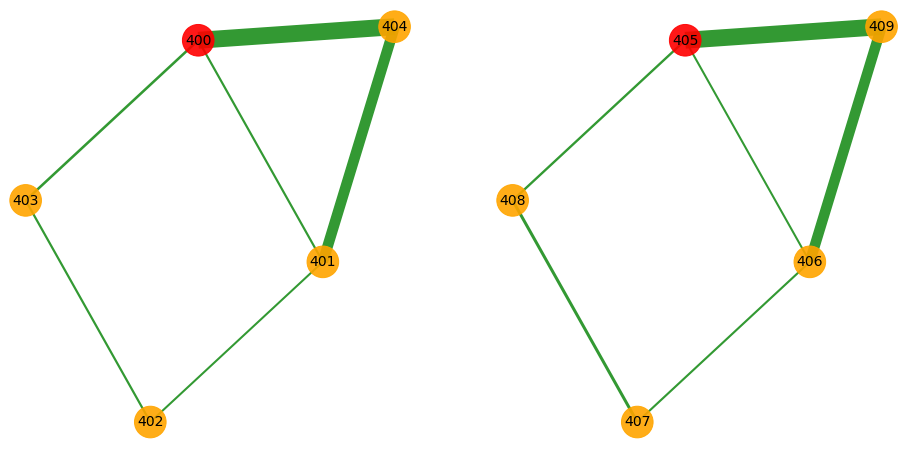

In [11]:
plt.rcParams["figure.figsize"] = [16, 8]
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.flatten()
explain_test(g, 400, 8, ax=ax[0], undir=True, scale=10)
ax[0].set_axis_off()
# 103, 276, 289
explain_test(g, 405, 5, ax=ax[1], undir=True, scale=10)
ax[1].set_axis_off()
# plt.savefig('./images/ba_shape.svg', format="svg", dpi=300)

When a node connect to a high degree node => affected by this node when performing PPR

In [10]:
selected_node = list(range(400, 700, 5))
test_graphs = [extract_true_motif(g, i, 399, 5, True) for i in selected_node]

In [15]:
s = time.time()
pred, rec, _ = evaluate_dataset(g, selected_node, test_graphs, 5, 6, ignore_self_loop=True, dumping_factor=0.55)
print(time.time() - s)

60it [00:01, 38.60it/s]

1.5613160133361816


In [16]:
print("Precision: %.4f Recall %.4f F1 %.4f"  % (pred, rec, pred*rec*2/(pred+rec)))

Precision: 0.9887 Recall 1.0000 F1 0.9943


In [20]:
s = time.time()
khop_graphs = khop_batch(model, g, selected_node, 2)
eval_dataset2(test_graphs, khop_graphs)
print(time.time() - s)

F1 Score: 0.673797
P Score: 0.940299
R score: 0.525000
0.15819668769836426


## BA Community

In [17]:
with open('./datasets/ba_community_bidir.g', 'rb') as f:
    g1 = pkl.load(f)

num_classes = 8
g1 = dgl.remove_self_loop(g1)
g1 = dgl.add_self_loop(g1)
test_labels1 = g1.ndata['label'][g1.ndata['test_mask']]
feats1 = g1.ndata['feat'].size()[1]
arg1 = Arg("gcn_mlp", [64], 5, 0.5, 64, True, True)
model1 = init_teacher(arg1, g1, feats1, num_classes)
ckpt1 = torch.load('./ckpt/gcn_mlp/ba_community_bidir01.pt', map_location="cuda:0")
model1.load_state_dict(ckpt1)

using norm in graph True
norm type: True
norm type: True
norm type: True
GCN_MLP2(
  (layers): ModuleList(
    (0): GraphConv(in=12, out=64, normalization=both, activation=None)
    (1): GraphConv(in=64, out=64, normalization=both, activation=None)
    (2): GraphConv(in=64, out=64, normalization=both, activation=None)
    (3): GraphConv(in=64, out=64, normalization=both, activation=None)
    (4): GraphConv(in=64, out=64, normalization=both, activation=None)
    (5): GraphConv(in=64, out=8, normalization=both, activation=None)
  )
  (batch_norms): ModuleList(
    (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

<All keys matched successfully>

In [18]:
compute_edge_weights(model1, g1)

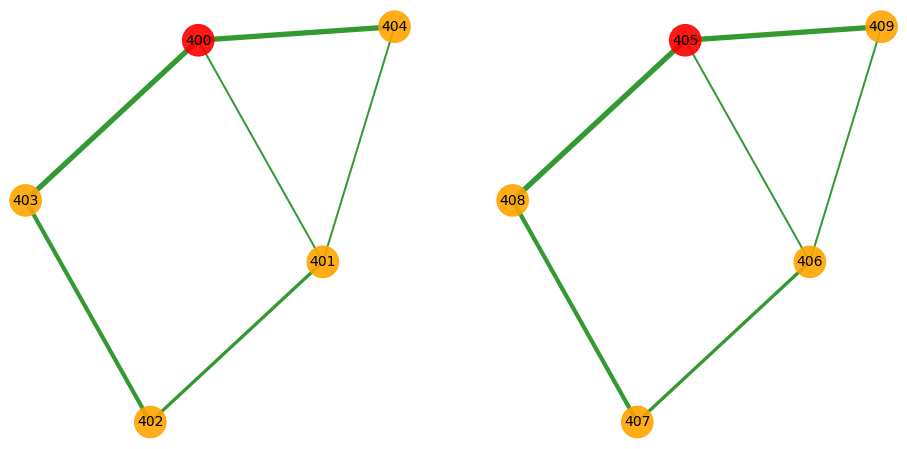

In [27]:
plt.rcParams["figure.figsize"] = [16, 8]
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.flatten()
explain_test(g1, 400, 10, ax=ax[0], scale=20)
ax[0].set_axis_off()
explain_test(g1, 405, 10, ax=ax[1], scale=20)
ax[1].set_axis_off()
# plt.savefig('./images/ba_community.svg', format="svg", dpi=300)

In [19]:
selected_node = list(range(400, 700, 5))
test_graphs2 = [extract_true_motif(g1, i, 399, 5, True) for i in selected_node]

In [23]:
s = time.time()
pred1, rec1, _ = evaluate_dataset(g1, selected_node, test_graphs2, 5, 7, ignore_self_loop=True, dumping_factor=0.55)
print(time.time() - s)

60it [00:03, 19.88it/s]

3.0248451232910156


In [24]:
print("Precision: %.4f Recall %.4f, F1: %.4f"  % (pred1, rec1, pred1*rec1*2/(pred1+rec1)))

Precision: 0.8575 Recall 0.9861, F1: 0.9173


In [25]:
s = time.time()
com_khop_graphs = khop_batch(model1, g1, selected_node, 2)
eval_dataset2(test_graphs2, com_khop_graphs)
print(time.time() - s)

F1 Score: 0.765589
P Score: 0.655138
R score: 0.920833
0.2114722728729248


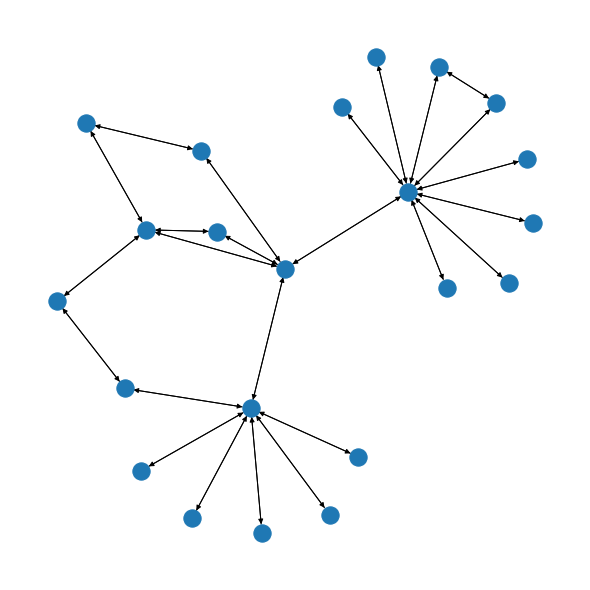

In [27]:
gx = dgl.to_networkx(com_khop_graphs[0])
pos = nx.kamada_kawai_layout(gx)
nx.draw(gx, pos)